# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:
sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [12]:
# Your code here:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [21]:
# Your code here:
sensor.count()

attitude.roll         1751
attitude.pitch        1751
attitude.yaw          1751
gravity.x             1751
gravity.y             1751
gravity.z             1751
rotationRate.x        1751
rotationRate.y        1751
rotationRate.z        1751
userAcceleration.x    1751
userAcceleration.y    1751
userAcceleration.z    1751
dtype: int64

How many rows and columns are in our data?

In [24]:
# Your code here:
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [146]:
# Your code here:
new_index = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10', periods=sensor.shape[0])
sensor.index = pd.DatetimeIndex(new_index,freq='infer')

Assign the time series index to the dataframe's index.

In [48]:
# Your code here:
# Ya lo hice arriba. Soy consciente de que no se ha inferido la frecuencia del index extraída del date_range.

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

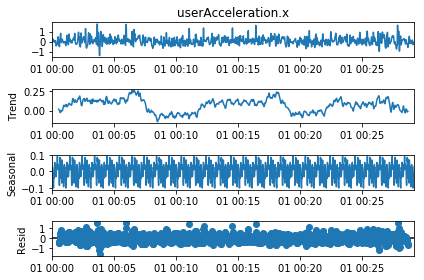

In [179]:
# Your code here
import matplotlib.pyplot as plt
import statsmodels.api as sm
data =sensor["userAcceleration.x"]
res = sm.tsa.seasonal_decompose(data, period=60)
res.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

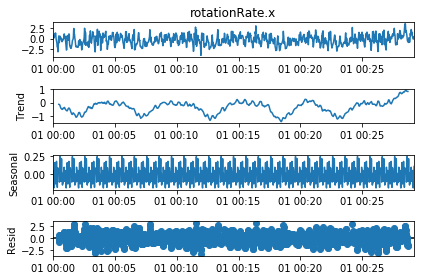

In [128]:
data =sensor["rotationRate.x"]
res = sm.tsa.seasonal_decompose(data, period=60)
res.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

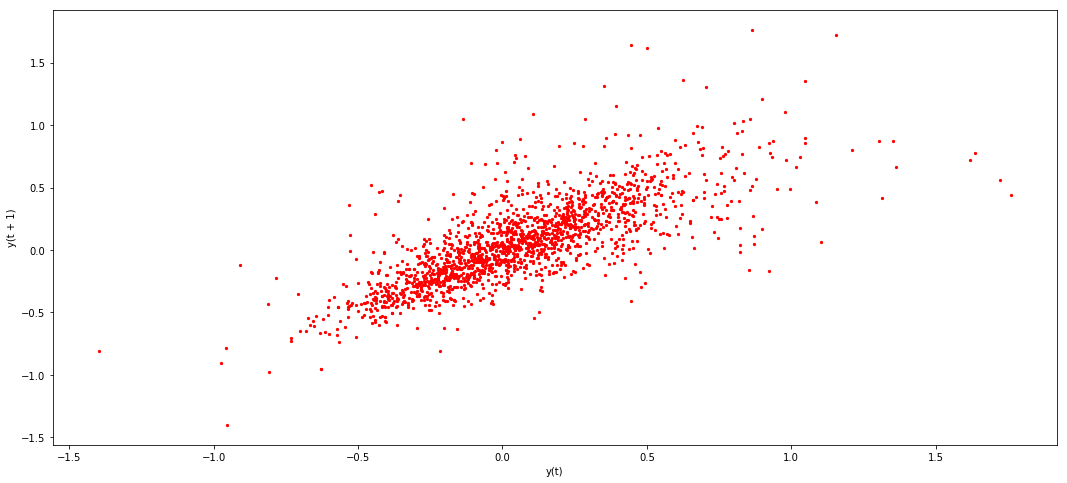

In [141]:
# Your code here:
plt.figure(figsize=(18,8))
pd.plotting.lag_plot(sensor["userAcceleration.x"], s=5, c="r")

Create a lag plot for `rotationRate.x`

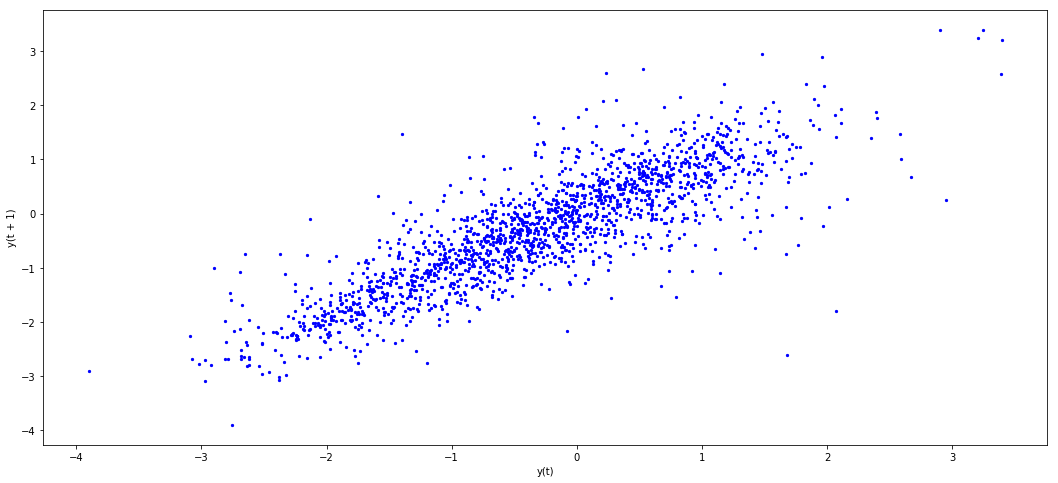

In [143]:
# Your code here:
plt.figure(figsize=(18,8))
pd.plotting.lag_plot(sensor["rotationRate.x"], s=5, c="b")

What are your conclusions from both visualizations?

In [11]:
# Your conclusions here:
Hay cierta correlación entre un valor y los previos, pero hay cierta dispersión

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [147]:
# Your code here:
from statsmodels.tsa.stattools import adfuller


What are your conclusions from this test?

In [151]:
# Your conclusions here:
stationaryCheck = lambda X: "Not-Stationary" if adfuller(X)[1] > 0.05 else "Stationary"
q = sensor._get_numeric_data()
print([(col,stationaryCheck(q[col])) for col in q.columns])

[('attitude.roll', 'Stationary'), ('attitude.pitch', 'Not-Stationary'), ('attitude.yaw', 'Stationary'), ('gravity.x', 'Not-Stationary'), ('gravity.y', 'Not-Stationary'), ('gravity.z', 'Stationary'), ('rotationRate.x', 'Stationary'), ('rotationRate.y', 'Stationary'), ('rotationRate.z', 'Stationary'), ('userAcceleration.x', 'Stationary'), ('userAcceleration.y', 'Stationary'), ('userAcceleration.z', 'Stationary')]


Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [160]:
train = sensor["userAcceleration.x"].iloc[:-10]
test = sensor["userAcceleration.x"].iloc[-10:]

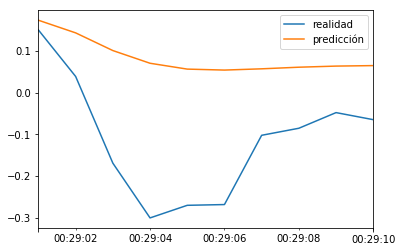

In [421]:
# Your code here:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(train, order=(2, 1))
model_fit = model.fit(disp=False)

predictions_ARMA = model_fit.predict(len(train), len(train)+len(test)-1)

test.plot()
predictions_ARMA.plot()
plt.legend(["realidad","predicción"]);

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [167]:
# Your code here:
from statsmodels.tools import eval_measures
statsmodels.tools.eval_measures.rmse(test, predictions_ARMA)

0.2252986475815301

# Autobonus:
Vamos a reprocesar el asunto pero esta vez, pasando primero el Low Pass Filter

In [ ]:
Vamos a ploterarlo:

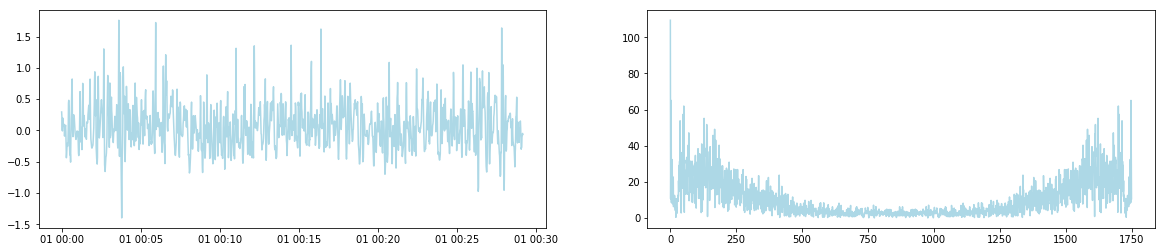

In [310]:
# ploteo la señal:
analisis = sensor["userAcceleration.x"]

# Cálculo de la FFT (Fast Fourier Transform)
from scipy.fftpack import fft
mod = np.abs(fft(analisis))

plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.plot(analisis, c="lightblue")
plt.subplot(1,2,2)
plt.plot(mod, c="lightblue");

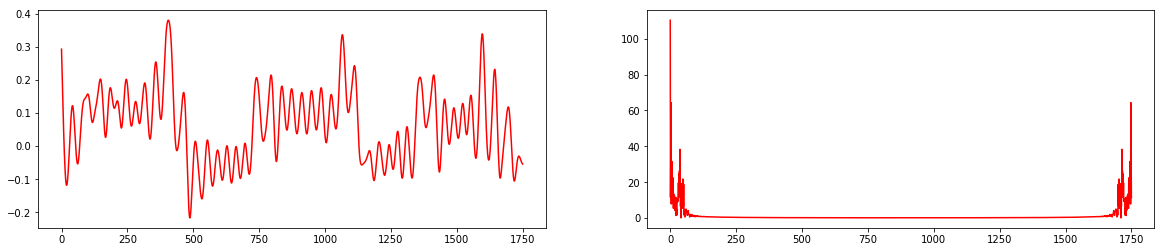

In [374]:
# ploteo la señal:
from scipy import signal
# b, a = butter_lowpass(cutoff_freq, nyq_freq, order=order)
#b, a = signal.butter(order, normal_cutoff, btype='lowpass')

b, a = signal.butter(3, 0.05)
data_filtered = signal.filtfilt(b, a, analisis)

# Cálculo de la FFT (Fast Fourier Transform)
from scipy.fftpack import fft
mod = np.abs(fft(data_filtered))

plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.plot(data_filtered, c="red")
plt.subplot(1,2,2)
plt.plot(mod, c="red");

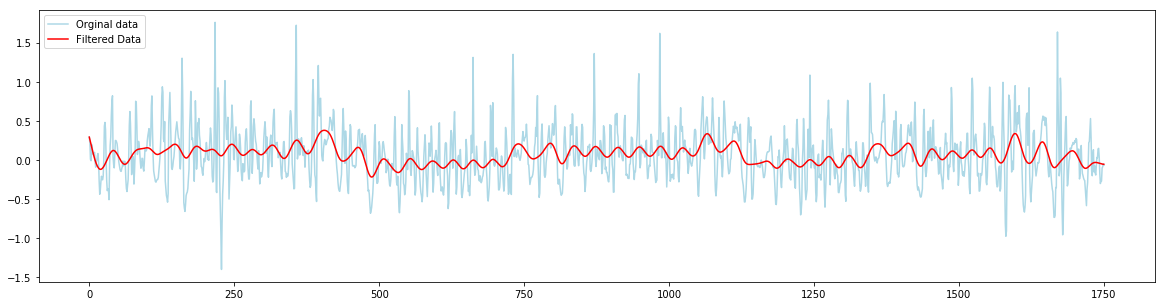

In [375]:
plt.figure(figsize=(20,5))
plt.plot(analisis.to_numpy(), c="lightblue")
plt.plot(data_filtered, c="red")
plt.legend(["Orginal data","Filtered Data"]);

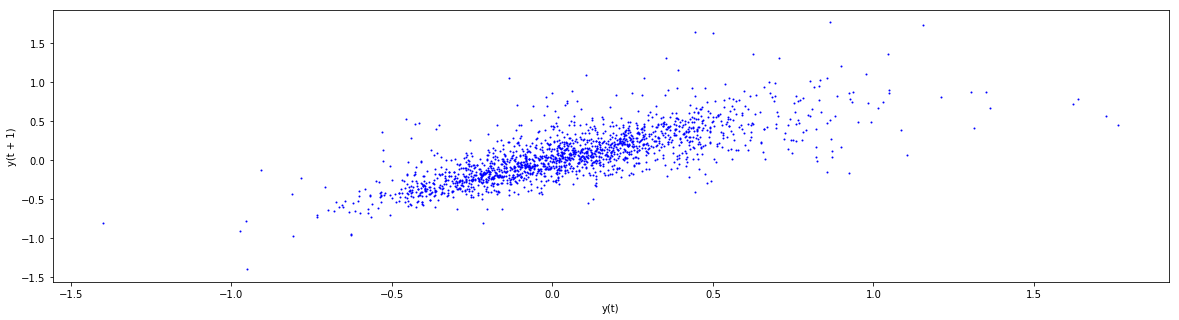

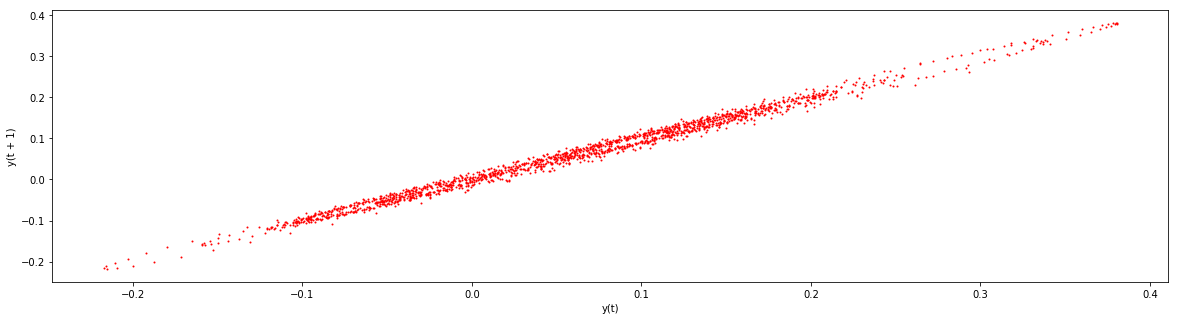

In [376]:
# Your code here:
df_an = pd.DataFrame(analisis)
plt.figure(figsize=(20,5))
pd.plotting.lag_plot(df_an, s=1, c="blue");

df_anf = pd.DataFrame(data_filtered)
plt.figure(figsize=(20,5))
pd.plotting.lag_plot(df_anf, s=1, c="r");

No entiendo muy bien por qué, pero parece que el lag.plot de la columna que estoy analizando, va "rotando" un plano sobre el cual están todos los puntos de correlación representados.
A mayor frecuencia, más rota el plano, y más se asemeja a una linea, puesto que lo estamos viendo desde un lateral. 
No śe.

In [419]:
# Entreno y compruebo la fidelidad frente a datos reales:
train = df_an.iloc[:-10]
test = df_an.iloc[-10:]

from statsmodels.tsa.arima_model import ARMA
model = ARMA(train, order=(2, 1))
model_fit = model.fit(disp=False)

pred_ARMA = model_fit.predict(len(train), len(train)+len(test)-1)

''

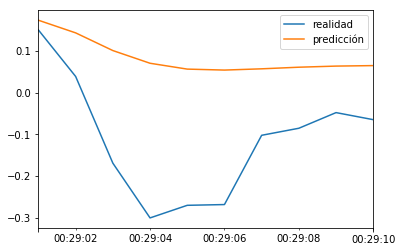

In [420]:
test.plot()
pred_ARMA.plot()
plt.legend(["realidad","predicción"]);
;

In [424]:
# Entreno y compruebo la fidelidad frente a datos reales:
train = df_anf.iloc[:-10]
test2 = df_anf.iloc[-10:]

from statsmodels.tsa.arima_model import ARMA
model = ARMA(train, order=(2, 0))
model_fit = model.fit(disp=False)

pred_ARMA2 = model_fit.predict(len(train), len(train)+len(test)-1)

''

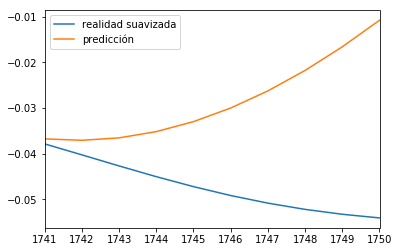

In [426]:
test2.plot()
pred_ARMA2.plot()
plt.legend(["realidad suavizada","predicción"]);
;